In [76]:
from numpy import mean
import tensorflow as tf
from tensorflow import keras
from numpy import std
from numpy import dstack
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import LSTM, Conv1D, concatenate,GlobalMaxPooling1D,TimeDistributed, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import numpy as np 
from numpy import save, load

In [77]:
def data_normalize(data_temp):
    data_temp2=data_temp.T
    data_temp2 -=np.mean(data_temp2,axis=0)
    data_temp2 /=np.std(data_temp2,axis=0)
    data_temp=data_temp2.T
    return data_temp

In [78]:
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [95]:
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [96]:
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/data/'
	# load all 9 files as a single array
	filenames = list()
	# body acceleration
	filenames += ["acc_x1.txt","acc_x2.txt","acc_y1.txt","acc_y2.txt","acc_z1.txt","acc_z2.txt"]
	# body gyroscope
	filenames += ["gyr_x1.txt","gyr_x2.txt","gyr_y1.txt","gyr_y2.txt","gyr_z1.txt","gyr_z2.txt"]
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

In [97]:
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'Dataset_6/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'Dataset_6/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [98]:
trainX, trainy, testX, testy=load_dataset()

(66542, 128, 12) (66542, 1)
(7600, 128, 12) (7600, 1)
(66542, 128, 12) (66542, 2) (7600, 128, 12) (7600, 2)


In [99]:
trainX.transpose(0,2,1)

array([[[-1.29670e+01, -1.29670e+01, -1.30334e+01, ..., -6.71162e+00,
         -6.97326e+00, -7.22548e+00],
        [-1.20189e+01, -1.20919e+01, -1.16355e+01, ..., -1.15188e+01,
         -1.18238e+01, -1.20771e+01],
        [-3.69665e+00, -3.91579e+00, -3.67540e+00, ..., -3.42565e+00,
         -3.13910e+00, -3.10191e+00],
        ...,
        [ 6.84170e-02,  3.11540e-02, -1.71810e-02, ...,  6.75390e-02,
          4.84900e-03,  2.92450e-02],
        [-5.86430e-02, -9.72040e-02,  2.88060e-02, ..., -2.85618e-01,
         -1.33837e-01, -6.21170e-02],
        [-1.08734e-01,  9.73760e-02,  2.85770e-01, ...,  2.61140e-02,
         -2.67630e-02, -1.30000e-01]],

       [[-8.45632e+00, -8.46425e+00, -6.61817e+00, ..., -3.69784e+00,
         -2.93828e+00, -1.74657e+00],
        [-1.33596e+01, -1.33508e+01, -1.22107e+01, ..., -1.15888e+01,
         -1.24926e+01, -1.39729e+01],
        [ 2.91518e+01,  2.30292e+01,  1.57440e+01, ...,  1.81570e+00,
          3.47339e+00,  7.46856e+00],
        ...,


In [100]:
data_normalize(trainX)

array([[[-2.05491341e+00, -1.84755141e+00, -2.73653250e-02, ...,
          7.96104598e-01,  7.68314896e-01,  7.57359332e-01],
        [-2.08364653e+00, -1.89231338e+00, -1.04676663e-01, ...,
          7.58288979e-01,  7.30224597e-01,  7.72767854e-01],
        [-2.18154602e+00, -1.87109810e+00, -1.03306119e-01, ...,
          7.09117121e-01,  7.19329988e-01,  7.76396973e-01],
        ...,
        [-1.25723708e+00, -2.68709028e+00, -2.79854356e-01, ...,
          7.59163831e-01,  6.54120404e-01,  7.46842331e-01],
        [-1.28714260e+00, -2.68126425e+00, -1.85144587e-01, ...,
          7.18475909e-01,  6.78615366e-01,  7.09390122e-01],
        [-1.32018849e+00, -2.67190219e+00, -1.71317382e-01, ...,
          7.01056197e-01,  6.75601758e-01,  6.56688821e-01]],

       [[-8.88824590e-01, -1.39315064e+00,  2.97935238e+00, ...,
          2.31113957e-03, -3.47587715e-02, -8.30355653e-04],
        [-1.01913460e+00, -1.57669176e+00,  2.57427967e+00, ...,
         -6.55166888e-02, -7.67884361e

In [101]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('trainX.npy', trainX)
#np.load(tranx.npy)
# load numpy array from npy file
from numpy import load
# load array
trainX = load('trainX.npy')
# print the array
print(trainX)

[[[-2.05491341e+00 -1.84755141e+00 -2.73653250e-02 ...  7.96104598e-01
    7.68314896e-01  7.57359332e-01]
  [-2.08364653e+00 -1.89231338e+00 -1.04676663e-01 ...  7.58288979e-01
    7.30224597e-01  7.72767854e-01]
  [-2.18154602e+00 -1.87109810e+00 -1.03306119e-01 ...  7.09117121e-01
    7.19329988e-01  7.76396973e-01]
  ...
  [-1.25723708e+00 -2.68709028e+00 -2.79854356e-01 ...  7.59163831e-01
    6.54120404e-01  7.46842331e-01]
  [-1.28714260e+00 -2.68126425e+00 -1.85144587e-01 ...  7.18475909e-01
    6.78615366e-01  7.09390122e-01]
  [-1.32018849e+00 -2.67190219e+00 -1.71317382e-01 ...  7.01056197e-01
    6.75601758e-01  6.56688821e-01]]

 [[-8.88824590e-01 -1.39315064e+00  2.97935238e+00 ...  2.31113957e-03
   -3.47587715e-02 -8.30355653e-04]
  [-1.01913460e+00 -1.57669176e+00  2.57427967e+00 ... -6.55166888e-02
   -7.67884361e-02 -1.43852326e-02]
  [-9.31096398e-01 -1.66364842e+00  1.99807035e+00 ... -1.15128333e-01
   -8.66427235e-02 -3.46424843e-02]
  ...
  [-6.73524291e-01 -2.7

In [102]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('trainy.npy', trainy)
#np.load(tranx.npy)
# load numpy array from npy file
from numpy import load
# load array
trainy = load('trainy.npy')
# print the array
print(trainy)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [103]:
data_normalize(testX)

array([[[-2.11214448e+00, -1.89596373e+00,  4.31587906e-01, ...,
         -1.16022188e-01,  1.12063605e-01,  1.39023238e-01],
        [-2.21238646e+00, -1.94121928e+00,  4.67935873e-01, ...,
         -1.48762107e-02,  1.60662312e-01,  1.57627307e-01],
        [-2.03827318e+00, -2.20931603e+00,  3.78663833e-01, ...,
          1.53963355e-01,  2.24516308e-01,  1.97899655e-01],
        ...,
        [-1.99795874e+00, -2.39444550e+00,  1.26652009e-01, ...,
          6.42419674e-01,  5.68011215e-01,  5.64986597e-01],
        [-2.07789391e+00, -2.31064999e+00,  2.00152006e-01, ...,
          4.18337416e-01,  4.26783778e-01,  3.83973823e-01],
        [-2.01053464e+00, -2.18960716e+00,  2.53789500e-01, ...,
          2.19138196e-01,  1.94431964e-01,  1.66258062e-01]],

       [[ 8.04480973e-01, -1.81179505e+00, -1.91753605e+00, ...,
          3.80630915e-02,  3.73348888e-01,  3.76992559e-01],
        [ 9.78818754e-01, -1.89813195e+00, -1.70776850e+00, ...,
          2.32803640e-01,  3.88357812e

In [104]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('testX.npy', testX)
#np.load(tranx.npy)
# load numpy array from npy file
from numpy import load
# load array
testX = load('testX.npy')
# print the array
print(testX)

[[[-2.11214448e+00 -1.89596373e+00  4.31587906e-01 ... -1.16022188e-01
    1.12063605e-01  1.39023238e-01]
  [-2.21238646e+00 -1.94121928e+00  4.67935873e-01 ... -1.48762107e-02
    1.60662312e-01  1.57627307e-01]
  [-2.03827318e+00 -2.20931603e+00  3.78663833e-01 ...  1.53963355e-01
    2.24516308e-01  1.97899655e-01]
  ...
  [-1.99795874e+00 -2.39444550e+00  1.26652009e-01 ...  6.42419674e-01
    5.68011215e-01  5.64986597e-01]
  [-2.07789391e+00 -2.31064999e+00  2.00152006e-01 ...  4.18337416e-01
    4.26783778e-01  3.83973823e-01]
  [-2.01053464e+00 -2.18960716e+00  2.53789500e-01 ...  2.19138196e-01
    1.94431964e-01  1.66258062e-01]]

 [[ 8.04480973e-01 -1.81179505e+00 -1.91753605e+00 ...  3.80630915e-02
    3.73348888e-01  3.76992559e-01]
  [ 9.78818754e-01 -1.89813195e+00 -1.70776850e+00 ...  2.32803640e-01
    3.88357812e-01  4.16855269e-01]
  [ 1.21891684e+00 -1.95030314e+00 -1.72178566e+00 ...  3.79976573e-01
    3.35723602e-01  3.99739657e-01]
  ...
  [ 1.84293942e+00 -2.5

In [105]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('testy.npy', testy)
#np.load(tranx.npy)
# load numpy array from npy file
from numpy import load
# load array
testy = load('testy.npy')
# print the array
print(testy)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [106]:
X_train = load('trainX.npy')
X_test = load('testX.npy')
y_train = load('trainy.npy')
y_test = load('testy.npy')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(66542, 128, 12) (66542, 2) (7600, 128, 12) (7600, 2)


In [107]:
from sklearn.model_selection import train_test_split
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [108]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [109]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=16, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=16, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights= True)]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 113, 64)           12352     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 64)            65600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [110]:
history = model.fit(X_training, y_training, epochs=200, verbose=True, validation_data=(X_validation, y_validation), batch_size=128,callbacks=callbacks)

Epoch 1/200
416/416 [==============================] - 33s 80ms/step - loss: 0.3064 - accuracy: 0.8721 - val_loss: 0.2548 - val_accuracy: 0.9031
Epoch 2/200
416/416 [==============================] - 35s 85ms/step - loss: 0.2208 - accuracy: 0.9109 - val_loss: 0.2244 - val_accuracy: 0.9140
Epoch 3/200
416/416 [==============================] - 34s 82ms/step - loss: 0.1903 - accuracy: 0.9248 - val_loss: 0.2147 - val_accuracy: 0.9161
Epoch 4/200
416/416 [==============================] - 36s 86ms/step - loss: 0.1698 - accuracy: 0.9328 - val_loss: 0.1744 - val_accuracy: 0.9346
Epoch 5/200
416/416 [==============================] - 37s 90ms/step - loss: 0.1509 - accuracy: 0.9420 - val_loss: 0.1675 - val_accuracy: 0.9356
Epoch 6/200
416/416 [==============================] - 36s 86ms/step - loss: 0.1410 - accuracy: 0.9461 - val_loss: 0.1721 - val_accuracy: 0.9352
Epoch 7/200
416/416 [==============================] - 36s 88ms/step - loss: 0.1302 - accuracy: 0.9494 - val_loss: 0.1560 - val_ac

In [111]:
loss, accuracy = model.evaluate(X_validation, y_validation, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Validation Accuracy:  0.9555
Testing Accuracy: 0.9201


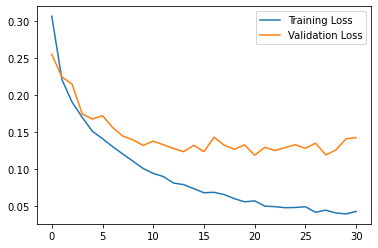

In [112]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()